Amostra dos Dados Gerados:
   Renda_Anual_k  Score_Gastos  ID_Cliente  Idade
0      27.483571     18.617357           1     62
1      28.238443     35.230299           2     35
2      23.829233     17.658630           3     55
3      32.896064     27.674347           4     52
4      22.652628     25.425600           5     68
--------------------------------------------------


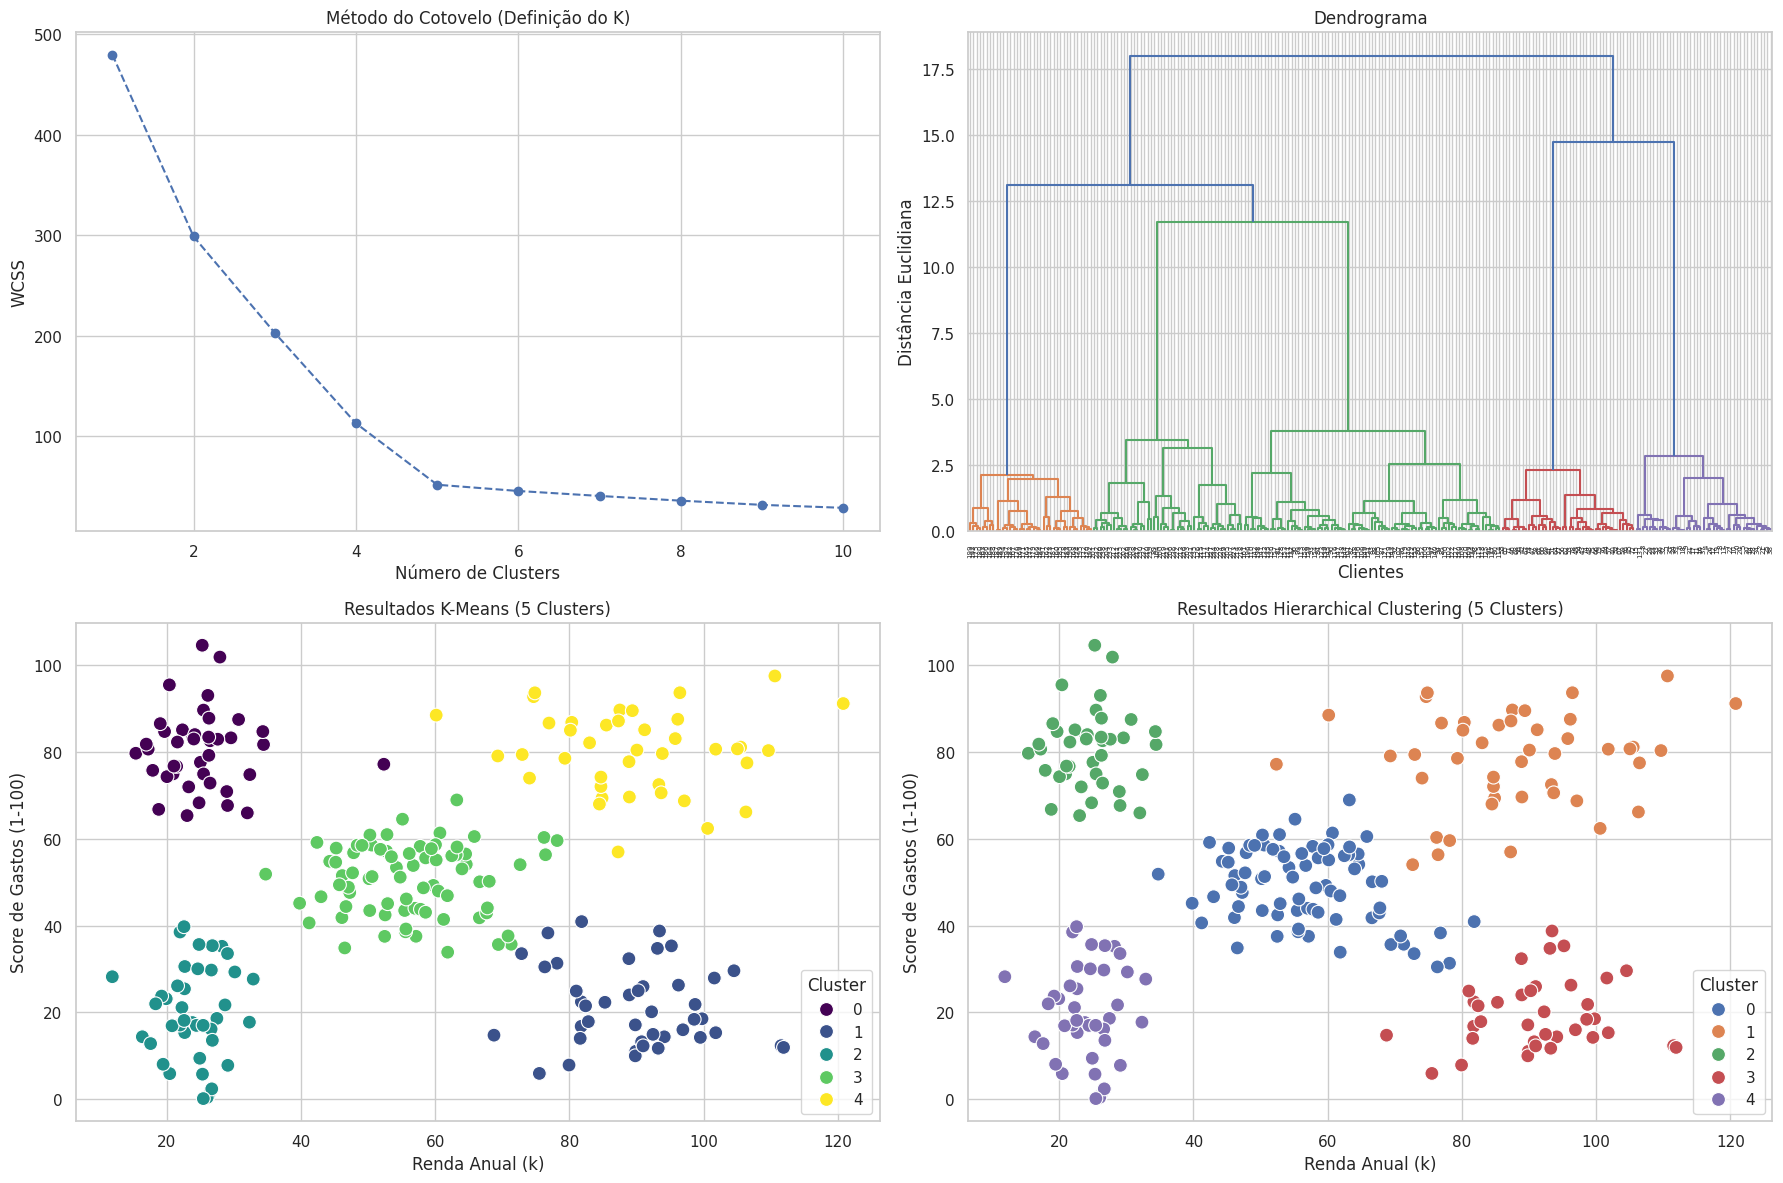

In [1]:
# ==============================================================================
# PROJETO INDIVIDUAL (PI2) - APRENDIZADO NÃO SUPERVISIONADO
# TEMA: Segmentação de Clientes de Shopping Center
# ALGORITMOS: K-Means e Hierarchical Clustering
# ==============================================================================

# 1. IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")

# ==============================================================================
# 2. GERAÇÃO DE DADOS FICTÍCIOS (MOCK DATA)
# ==============================================================================
# Vamos criar 5 grupos de clientes propositais para simular um cenário real de Shopping
np.random.seed(42)

# Grupo A: Baixa Renda, Baixo Gasto (Econômicos)
grupo_a = np.random.normal(loc=[25, 20], scale=[5, 10], size=(40, 2))
# Grupo B: Baixa Renda, Alto Gasto (Imprudentes/Universitários)
grupo_b = np.random.normal(loc=[25, 80], scale=[5, 10], size=(40, 2))
# Grupo C: Renda Média, Gasto Médio (Massa)
grupo_c = np.random.normal(loc=[55, 50], scale=[10, 10], size=(80, 2))
# Grupo D: Alta Renda, Baixo Gasto (Poupadores/Ricos Frugais)
grupo_d = np.random.normal(loc=[90, 20], scale=[10, 10], size=(40, 2))
# Grupo E: Alta Renda, Alto Gasto (VIPs)
grupo_e = np.random.normal(loc=[90, 80], scale=[10, 10], size=(40, 2))

# Unindo os dados
dados = np.concatenate([grupo_a, grupo_b, grupo_c, grupo_d, grupo_e])
df = pd.DataFrame(dados, columns=['Renda_Anual_k', 'Score_Gastos'])

# Adicionando ID e Idade aleatória (apenas para compor o dataset, não usaremos no modelo)
df['ID_Cliente'] = range(1, len(df) + 1)
df['Idade'] = np.random.randint(18, 70, size=len(df))

print("Amostra dos Dados Gerados:")
print(df.head())
print("-" * 50)

# ==============================================================================
# 3. ETL E PRÉ-PROCESSAMENTO
# ==============================================================================

# Selecionando apenas as variáveis de interesse para o agrupamento
X = df[['Renda_Anual_k', 'Score_Gastos']].values

# PADRONIZAÇÃO (StandardScaler)
# Necessário porque algoritmos de cluster baseados em distância são sensíveis à escala.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================================================================
# 4. MODELAGEM E VISUALIZAÇÃO
# ==============================================================================

plt.figure(figsize=(18, 12))

# --- A. MÉTODO DO COTOVELO (ELBOW METHOD) PARA K-MEANS ---
plt.subplot(2, 2, 1)
wcss = [] # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Definição do K)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

# --- B. DENDROGRAMA PARA HIERARCHICAL CLUSTERING ---
plt.subplot(2, 2, 2)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')

# Com base no Cotovelo e Dendrograma, vamos assumir K=5
k_ideal = 5

# --- C. APLICANDO K-MEANS (K=5) ---
kmeans_final = KMeans(n_clusters=k_ideal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(X_scaled)

plt.subplot(2, 2, 3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', s=100)
plt.title(f'Resultados K-Means ({k_ideal} Clusters)')
plt.xlabel('Renda Anual (k)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend(title='Cluster')

# --- D. APLICANDO HIERARCHICAL CLUSTERING (K=5) ---
hc = AgglomerativeClustering(n_clusters=k_ideal, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

plt.subplot(2, 2, 4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hc, palette='deep', s=100)
plt.title(f'Resultados Hierarchical Clustering ({k_ideal} Clusters)')
plt.xlabel('Renda Anual (k)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()